In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import pickle
import datetime
sns.set_style("darkgrid")
tf.random.set_seed(51)
np.random.seed(51)
import matplotlib.ticker
from matplotlib import dates

In [ ]:
df = pd.read_excel('/content/data Ch baru.xlsx')
df

,Tanggal,RR
0,2014-01-31,836
1,2014-02-28,313
2,2014-03-31,311
3,2014-04-30,282
4,2014-05-31,105
...,...,...
91,2021-08-31,64
92,2021-09-30,115
93,2021-10-31,108
94,2021-11-30,328


In [ ]:
# check missing value
df.isna().sum()

Tanggal    0
RR         0
dtype: int64

In [ ]:
# Mengubah data curah hujan kedalam bentuk bulanan
dfa = df.set_index('Tanggal')
df_month = dfa.resample("Tanggal").sum()
df_month

ValueError: ignored

Text(0, 0.5, 'Curah Hujan (mm)')

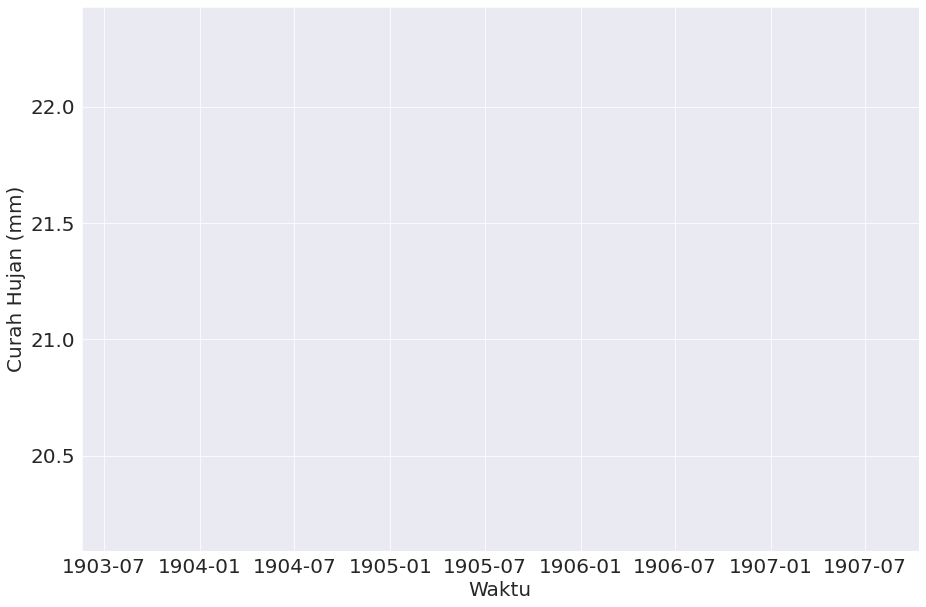

In [ ]:
# Plot Curah Hujan 2014-2021
plt.figure(figsize=(15,10))
sns.lineplot(data=df_month, x=df_month.index, y="Ips", linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("Waktu", fontsize=20)
plt.ylabel("Curah Hujan (mm)", fontsize=20)

Text(0, 0.5, 'Curah Hujan (mm)')

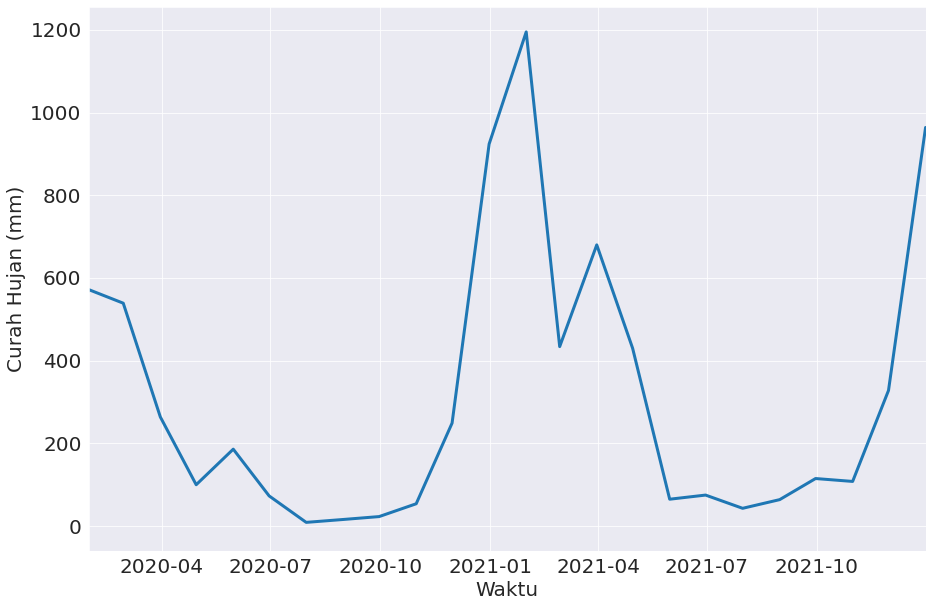

In [ ]:
# Plot curah hujan 2014-2021
plt.figure(figsize=(15,10))
sns.lineplot(data=df_month, x=df_month.index, y="RR", linewidth=3)
plt.xlim([datetime.date(2020, 1, 31),datetime.date(2021, 12, 31)])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("Waktu", fontsize=20)
plt.ylabel("Curah Hujan (mm)", fontsize=20)

In [ ]:
# Normalisasi Data
scaler = MinMaxScaler()
scaler.fit(df_month)
df_month_scaled = scaler.transform(df_month)
df_month_scaled

array([[6.99581590e-01],
       [2.61924686e-01],
       [2.60251046e-01],
       [2.35983264e-01],
       [8.78661088e-02],
       [1.12133891e-01],
       [2.51046025e-02],
       [5.02092050e-03],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.79079498e-02],
       [5.63179916e-01],
       [8.05020921e-01],
       [2.97071130e-01],
       [2.56066946e-01],
       [1.70711297e-01],
       [7.53138075e-03],
       [4.60251046e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.23849372e-01],
       [5.17991632e-01],
       [3.22175732e-01],
       [6.08368201e-01],
       [1.87447699e-01],
       [1.01255230e-01],
       [3.68200837e-02],
       [3.93305439e-02],
       [1.17154812e-02],
       [0.00000000e+00],
       [6.61087866e-02],
       [3.55648536e-01],
       [1.25523013e-01],
       [4.57740586e-01],
       [6.15062762e-01],
       [3.38912134e-01],
       [3.74895397e-01],
       [1.88284519e-01],


In [ ]:
# Membagi data training dan testing
split_time = 84

time_latih = df_month.index[:split_time]
data_latih = df_month_scaled[:split_time]
time_valid = df_month.index[split_time:]
data_valid = df_month_scaled[split_time-12:]
data_test = df_month_scaled[split_time:]

In [ ]:
# Banyaknya
print(len(data_latih))
print(len(data_valid))
print(len(data_test))

84
24
12


In [ ]:
# Fungsi data window untuk input jaringan
def windowed_dataset(data, window_size, batch_size, shuffle_buffer):
  '''
  Utility function for time series data generation in batches
  '''
  ts_data = tf.data.Dataset.from_tensor_slices(data)
  ts_data = ts_data.window(window_size + 1, shift=1, drop_remainder=True)
  ts_data = ts_data.flat_map(lambda window: window.batch(window_size + 1))
  ts_data = ts_data.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  ts_data = ts_data.batch(batch_size).prefetch(1)
  return ts_data

In [ ]:
# mendefinisikan data input
dataset_latih = windowed_dataset(data_latih, window_size=12, batch_size=2, shuffle_buffer=1)
dataset_valid = windowed_dataset(data_valid, window_size=12, batch_size=2, shuffle_buffer=1)

In [ ]:
# Mendefinisikan Model 1 (12-4-1)
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(1, activation='relu'),
])

In [ ]:
# Mendefinisikan Model 2 (12-8-1)
tf.keras.backend.clear_session()
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(1, activation="relu"),
])

In [ ]:
# Mendefinisikan Model 3 (12-12-1)
tf.keras.backend.clear_session()
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(1, activation="relu"),
])

In [ ]:
# Mendefinisikan Model 4 (12-16-1)
tf.keras.backend.clear_session()
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(1, activation = 'relu'),
])

In [ ]:
# Mendefinisikan Model 5 (12-4-4-1)
tf.keras.backend.clear_session()
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(4, activation ="relu"),
  tf.keras.layers.Dense(1, activation="relu"),
])

In [ ]:
# Mendefinisikan Model 6 (12-8-8-1)
tf.keras.backend.clear_session()
model6 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu"),
])

In [ ]:
# Mendefinisikan Model 7 (12-12-12-1)
tf.keras.backend.clear_session()
model7 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(12, activation ="relu"),
  tf.keras.layers.Dense(1, activation = "relu"),
])

In [ ]:
# Mendefinisikan Model 8 (12-16-16-1)
tf.keras.backend.clear_session()
model8 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(16, activation ="relu"),
  tf.keras.layers.Dense(1, activation ="relu")
])

In [ ]:
# Mendefinisikan Model 9 (12-1-1-1)
tf.keras.backend.clear_session()
model9 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(1, activation ="relu"),
  tf.keras.layers.Dense(1, activation ="relu")
])

In [ ]:
# Mendefinisikan Model 10 (12-1-1-1-1)
tf.keras.backend.clear_session()
model10 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(1, activation ="relu"),
  tf.keras.layers.Dense(1, activation ="relu"),
  tf.keras.layers.Dense(1, activation ="relu")
])

In [ ]:
# Mendefinisikan Model 11 (12-15-1-1-1)
tf.keras.backend.clear_session()
model11 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(15, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(1, activation ="relu"),
  tf.keras.layers.Dense(1, activation ="relu"),
  tf.keras.layers.Dense(1, activation ="relu")
])

In [ ]:
# Mendefinisikan Model 12 (12-20-1-1-1)
tf.keras.backend.clear_session()
model12 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(1, activation ="relu"),
  tf.keras.layers.Dense(1, activation ="relu"),
  tf.keras.layers.Dense(1, activation ="relu")
])

In [ ]:
# Mendefinisikan Model 13 (12-20-20-20-1)
tf.keras.backend.clear_session()
model13 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(20, activation ="relu"),
  tf.keras.layers.Dense(20, activation ="relu"),
  tf.keras.layers.Dense(1, activation ="relu")
])

In [ ]:
# Mendefinisikan Model 14 (12-18-18-18-1)
tf.keras.backend.clear_session()
model14 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(18, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(18, activation ="relu"),
  tf.keras.layers.Dense(18, activation ="relu"),
  tf.keras.layers.Dense(1, activation ="relu")
])

In [ ]:
# Mendefinisikan Model 15 (12-9-1)
tf.keras.backend.clear_session()
model15 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(9, input_shape=[12], activation="relu"),
  tf.keras.layers.Dense(1, activation ="relu")
])

In [ ]:
model14.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                234       
                                                                 
 dense_1 (Dense)             (None, 18)                342       
                                                                 
 dense_2 (Dense)             (None, 18)                342       
                                                                 
 dense_3 (Dense)             (None, 1)                 19        
                                                                 
Total params: 937
Trainable params: 937
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Pelatihan Model
model1.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model2.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model3.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model4.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model5.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model6.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model7.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model8.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model9.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model10.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model11.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model12.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model13.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model14.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Pelatihan Model
model15.compile(loss='mse',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8), 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
history = model1.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 7ms/step - loss: 0.1122 - root_mean_squared_error: 0.3349 - val_loss: 0.1933 - val_root_mean_squared_error: 0.4397
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0944 - root_mean_squared_error: 0.3072 - val_loss: 0.1817 - val_root_mean_squared_error: 0.4263
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0841 - root_mean_squared_error: 0.2901 - val_loss: 0.1524 - val_root_mean_squared_error: 0.3904
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0650 - root_mean_squared_error: 0.2550 - val_loss: 0.1309 - val_root_mean_squared_error: 0.3618
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0585 - root_mean_squared_error: 0.2419 - val_loss: 0.1227 - val_root_mean_squared_error: 0.3502
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0563 - root_mean_squared_error: 0.2373 - val_loss: 0.1184 - val_root_m

In [ ]:
history = model2.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 7ms/step - loss: 0.0705 - root_mean_squared_error: 0.2655 - val_loss: 0.1106 - val_root_mean_squared_error: 0.3325
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0387 - root_mean_squared_error: 0.1966 - val_loss: 0.0903 - val_root_mean_squared_error: 0.3004
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0322 - root_mean_squared_error: 0.1794 - val_loss: 0.0824 - val_root_mean_squared_error: 0.2870
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0298 - root_mean_squared_error: 0.1727 - val_loss: 0.0767 - val_root_mean_squared_error: 0.2769
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0284 - root_mean_squared_error: 0.1685 - val_loss: 0.0714 - val_root_mean_squared_error: 0.2671
Epoch 6/300
36/36 [==============================] - 0s 2ms/step - loss: 0.0271 - root_mean_squared_error: 0.1647 - val_loss: 0.0673 - val_root_m

In [ ]:
history = model3.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 7ms/step - loss: 0.0567 - root_mean_squared_error: 0.2382 - val_loss: 0.1055 - val_root_mean_squared_error: 0.3248
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0319 - root_mean_squared_error: 0.1786 - val_loss: 0.0932 - val_root_mean_squared_error: 0.3052
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0258 - root_mean_squared_error: 0.1607 - val_loss: 0.0858 - val_root_mean_squared_error: 0.2928
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0230 - root_mean_squared_error: 0.1517 - val_loss: 0.0802 - val_root_mean_squared_error: 0.2832
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0215 - root_mean_squared_error: 0.1466 - val_loss: 0.0754 - val_root_mean_squared_error: 0.2746
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0199 - root_mean_squared_error: 0.1412 - val_loss: 0.0732 - val_root_m

In [ ]:
history = model4.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 7ms/step - loss: 0.0716 - root_mean_squared_error: 0.2676 - val_loss: 0.0980 - val_root_mean_squared_error: 0.3130
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0390 - root_mean_squared_error: 0.1974 - val_loss: 0.0743 - val_root_mean_squared_error: 0.2725
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0314 - root_mean_squared_error: 0.1771 - val_loss: 0.0651 - val_root_mean_squared_error: 0.2552
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0274 - root_mean_squared_error: 0.1656 - val_loss: 0.0617 - val_root_mean_squared_error: 0.2485
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0252 - root_mean_squared_error: 0.1586 - val_loss: 0.0582 - val_root_mean_squared_error: 0.2413
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0238 - root_mean_squared_error: 0.1543 - val_loss: 0.0555 - val_root_m

In [ ]:
history = model5.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 7ms/step - loss: 0.0707 - root_mean_squared_error: 0.2658 - val_loss: 0.1238 - val_root_mean_squared_error: 0.3519
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0551 - root_mean_squared_error: 0.2348 - val_loss: 0.1137 - val_root_mean_squared_error: 0.3371
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0494 - root_mean_squared_error: 0.2223 - val_loss: 0.1062 - val_root_mean_squared_error: 0.3259
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0450 - root_mean_squared_error: 0.2121 - val_loss: 0.0985 - val_root_mean_squared_error: 0.3139
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0412 - root_mean_squared_error: 0.2031 - val_loss: 0.0923 - val_root_mean_squared_error: 0.3038
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0381 - root_mean_squared_error: 0.1951 - val_loss: 0.0861 - val_root_m

In [ ]:
history = model6.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 6ms/step - loss: 0.0943 - root_mean_squared_error: 0.3071 - val_loss: 0.1794 - val_root_mean_squared_error: 0.4236
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0605 - root_mean_squared_error: 0.2459 - val_loss: 0.1055 - val_root_mean_squared_error: 0.3249
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0458 - root_mean_squared_error: 0.2141 - val_loss: 0.0905 - val_root_mean_squared_error: 0.3009
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0394 - root_mean_squared_error: 0.1984 - val_loss: 0.0818 - val_root_mean_squared_error: 0.2861
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0350 - root_mean_squared_error: 0.1871 - val_loss: 0.0764 - val_root_mean_squared_error: 0.2764
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0322 - root_mean_squared_error: 0.1796 - val_loss: 0.0733 - val_root_m

In [ ]:
history = model7.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 7ms/step - loss: 0.0996 - root_mean_squared_error: 0.3156 - val_loss: 0.1853 - val_root_mean_squared_error: 0.4305
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0926 - root_mean_squared_error: 0.3042 - val_loss: 0.1795 - val_root_mean_squared_error: 0.4237
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0878 - root_mean_squared_error: 0.2963 - val_loss: 0.1641 - val_root_mean_squared_error: 0.4051
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0670 - root_mean_squared_error: 0.2589 - val_loss: 0.0617 - val_root_mean_squared_error: 0.2483
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0289 - root_mean_squared_error: 0.1700 - val_loss: 0.0522 - val_root_mean_squared_error: 0.2284
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0237 - root_mean_squared_error: 0.1538 - val_loss: 0.0512 - val_root_m

In [ ]:
history = model8.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 7ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_m

In [ ]:
history = model9.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 6ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_m

In [ ]:
history = model10.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 6ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 3/300
36/36 [==============================] - 0s 2ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_m

In [ ]:
history = model11.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 7ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 2/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_m

In [ ]:
history = model12.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 7ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_mean_squared_error: 0.4416
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.1950 - val_root_m

In [ ]:
history = model13.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 8ms/step - loss: 0.0553 - root_mean_squared_error: 0.2352 - val_loss: 0.1035 - val_root_mean_squared_error: 0.3217
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0427 - root_mean_squared_error: 0.2066 - val_loss: 0.0897 - val_root_mean_squared_error: 0.2994
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0356 - root_mean_squared_error: 0.1886 - val_loss: 0.0780 - val_root_mean_squared_error: 0.2793
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0303 - root_mean_squared_error: 0.1740 - val_loss: 0.0696 - val_root_mean_squared_error: 0.2637
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0265 - root_mean_squared_error: 0.1628 - val_loss: 0.0644 - val_root_mean_squared_error: 0.2537
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0242 - root_mean_squared_error: 0.1555 - val_loss: 0.0632 - val_root_m

In [ ]:
history = model14.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 7ms/step - loss: 0.0406 - root_mean_squared_error: 0.2014 - val_loss: 0.0825 - val_root_mean_squared_error: 0.2872
Epoch 2/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0290 - root_mean_squared_error: 0.1703 - val_loss: 0.0777 - val_root_mean_squared_error: 0.2787
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0257 - root_mean_squared_error: 0.1602 - val_loss: 0.0748 - val_root_mean_squared_error: 0.2735
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0236 - root_mean_squared_error: 0.1536 - val_loss: 0.0708 - val_root_mean_squared_error: 0.2662
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0222 - root_mean_squared_error: 0.1491 - val_loss: 0.0684 - val_root_mean_squared_error: 0.2615
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0210 - root_mean_squared_error: 0.1449 - val_loss: 0.0668 - val_root_m

In [ ]:
history = model15.fit(dataset_latih, 
                     validation_data = dataset_valid, 
                     epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 7ms/step - loss: 0.0642 - root_mean_squared_error: 0.2534 - val_loss: 0.0986 - val_root_mean_squared_error: 0.3140
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0540 - root_mean_squared_error: 0.2324 - val_loss: 0.0799 - val_root_mean_squared_error: 0.2827
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0413 - root_mean_squared_error: 0.2033 - val_loss: 0.0597 - val_root_mean_squared_error: 0.2443
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0335 - root_mean_squared_error: 0.1830 - val_loss: 0.0563 - val_root_mean_squared_error: 0.2374
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0301 - root_mean_squared_error: 0.1734 - val_loss: 0.0546 - val_root_mean_squared_error: 0.2337
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0281 - root_mean_squared_error: 0.1677 - val_loss: 0.0537 - val_root_m

In [ ]:
# Evaluasi Model
forecast = []
for time in range(len(df_month_scaled) - 12):
  pred = model14.predict(df_month_scaled[time:time + 12][np.newaxis])
  forecast.append(pred)
forecast1 = forecast[84-12:]
results = np.array(forecast1)[:, 0, 0]

In [ ]:
# Denormalisasi Hasil Peramalan
hasil = scaler.inverse_transform(np.reshape(results, (len(results),1)))
test = scaler.inverse_transform(np.reshape(data_test, (len(results),1)))

In [ ]:
# Membentuk tabel perbandingan
hasil_df = pd.DataFrame(hasil, columns = ['hasil'])
test_df = pd.DataFrame(test, columns = ['data_test'])
gabung = pd.concat([test_df, hasil_df], axis=1)
gabung

,data_test,hasil
0,1195.0,659.834229
1,434.0,477.839386
2,680.0,470.517120
3,430.0,322.231812
4,65.0,0.000000
5,75.0,164.764252
6,43.0,0.000000
7,64.0,0.000000
8,115.0,0.000000
9,108.0,0.000000


In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format, linewidth=3)
    plt.xlabel("Waktu", fontsize=20)
    plt.ylabel("Curah Hujan (mm)", fontsize=20)
    plt.grid(True)

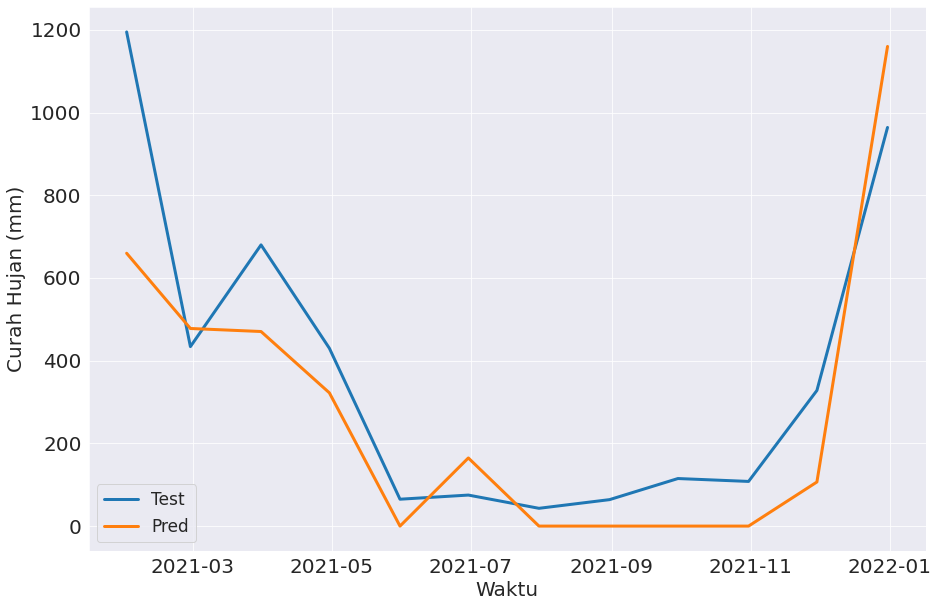

In [ ]:
# Plot perbandingan hasil prediksi dan data tes
plt.figure(figsize=(15,10))

plot_series(time_valid,gabung['data_test'])
plot_series(time_valid,gabung['hasil'])
plt.legend(loc="upper left", fontsize=17)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(('Test', 'Pred') , fontsize=17)

In [ ]:
# Menampilkan MSE dan RMSE pada data denormalisasi dan normalisasi 
rmse = np.sqrt(mean_squared_error(hasil_df, test_df))
mse = mean_squared_error(hasil_df, test_df)
rmse_scaled = np.sqrt(mean_squared_error(results, data_test))
mse_scaled = mean_squared_error(results, data_test)
print(rmse)
print(mse)
print(rmse_scaled)
print(mse_scaled)

198.81317866199356
39526.68000968577
0.16637086002657964
0.027679263065983752


In [ ]:
model_dict = {}

In [ ]:
# Menyimpan informasi model kedalam dictionary
model_dict['model14'] = {'history': history,
  'model': model14,
  'mse': mse,
  'mse_scaled': mse_scaled,
  'rmse': rmse,
  'rmse_scaled': rmse_scaled}
print(model_dict)

{'model14': {'history': <keras.callbacks.History object at 0x7f64094006d0>, 'model': <keras.engine.sequential.Sequential object at 0x7f640a4628d0>, 'mse': 39526.68000968577, 'mse_scaled': 0.027679263065983752, 'rmse': 198.81317866199356, 'rmse_scaled': 0.16637086002657964}}


In [ ]:
# Menyimpan Dictionary informasi model
import pickle
with open('model_dict.pkl', 'wb') as f:
    pickle.dump(model_dict, f)

In [ ]:
#Load Dictionary Model
with open('model_dict.pkl', 'rb') as f:
  model_dict = pickle.load(f)

In [ ]:
model_dict

{'model14': {'history': <keras.callbacks.History at 0x7f6408eae350>,
  'model': <keras.engine.sequential.Sequential at 0x7f6408da2110>,
  'mse': 39526.68000968577,
  'mse_scaled': 0.027679263065983752,
  'rmse': 198.81317866199356,
  'rmse_scaled': 0.16637086002657964}}

In [ ]:
model_dict['model14']['model'].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                234       
                                                                 
 dense_1 (Dense)             (None, 18)                342       
                                                                 
 dense_2 (Dense)             (None, 18)                342       
                                                                 
 dense_3 (Dense)             (None, 1)                 19        
                                                                 
Total params: 937
Trainable params: 937
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fungsi plot nilai RMSE dan MSE
def plot_loss(model):
  loss = model_dict[model]['history'].history['loss']
  val_loss = model_dict[model]['history'].history['val_loss']

  plt.figure(figsize=(8,5))
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Training MSE and Validation MSE')
  plt.legend(['Training MSE', 'Validation MSE'])

  mse_training = model_dict[model]['history'].history['loss'][-1]
  mse_validation = model_dict[model]['history'].history['val_loss'][-1]
  print('Nilai Training MSE dari {} adalah {}'.format(model, mse_training))
  print('Nilai Validation MSE dari {} adalah {}'.format(model, mse_validation))

  train_rmse = model_dict[model]['history'].history['root_mean_squared_error']
  val_rmse = model_dict[model]['history'].history['val_root_mean_squared_error']
  print('Nilai Training RMSE dari {} adalah {}'.format(model, train_rmse))
  print('Nilai Validation RMSE dari {} adalah {}'.format(model, val_rmse))
                                                        
  plt.figure(figsize=(8,5))
  plt.plot(train_rmse)
  plt.plot(val_rmse)
  plt.title('Training RMSE and Validation RMSE')
  plt.legend(['Training RMSE', 'Validation RMSE'])

Nilai Training MSE dari model14 adalah 0.010735251009464264
Nilai Validation MSE dari model14 adalah 0.04018425568938255
Nilai Training RMSE dari model14 adalah [0.25342461466789246, 0.2324463427066803, 0.20330870151519775, 0.18297582864761353, 0.17337411642074585, 0.16766361892223358, 0.16388048231601715, 0.16111242771148682, 0.1585918813943863, 0.15650394558906555, 0.15445438027381897, 0.15282882750034332, 0.15169522166252136, 0.15078814327716827, 0.1500665843486786, 0.14940913021564484, 0.149005725979805, 0.14861637353897095, 0.1482485830783844, 0.14790569245815277, 0.14758478105068207, 0.14728306233882904, 0.14699923992156982, 0.14678189158439636, 0.14651049673557281, 0.14595665037631989, 0.1455226093530655, 0.1452803760766983, 0.14498980343341827, 0.1446019858121872, 0.14449863135814667, 0.14434805512428284, 0.14411333203315735, 0.1438983976840973, 0.14387448132038116, 0.14349128305912018, 0.1433221846818924, 0.14303871989250183, 0.1430499255657196, 0.1428954154253006, 0.142736196

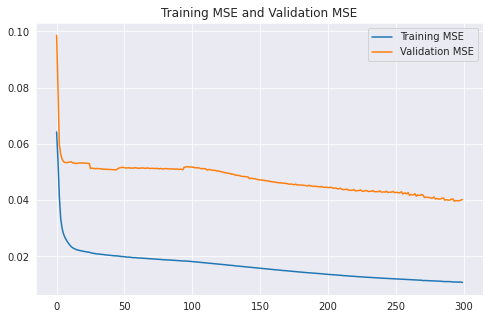

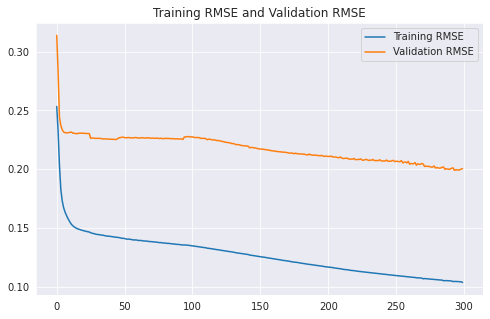

In [ ]:
# plot Nilai RMSE dan MSE
plot_loss('model14')

In [ ]:
# Plot perbandingan masing-masing model
def comparison_plot(metric):
  plt.figure(figsize=(15,10))
  for model in model_dict:
    plot = model_dict[model]['history'].history[metric]
    plt.plot(plot, linewidth=3, label=model)
  plt.legend(loc="upper right", fontsize=17)
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel('Epochs', fontsize=20)
  plt.ylabel('RMSE', fontsize=20)

In [ ]:
for model in model_dict:
  print(model)

model14


(0.18, 0.275)

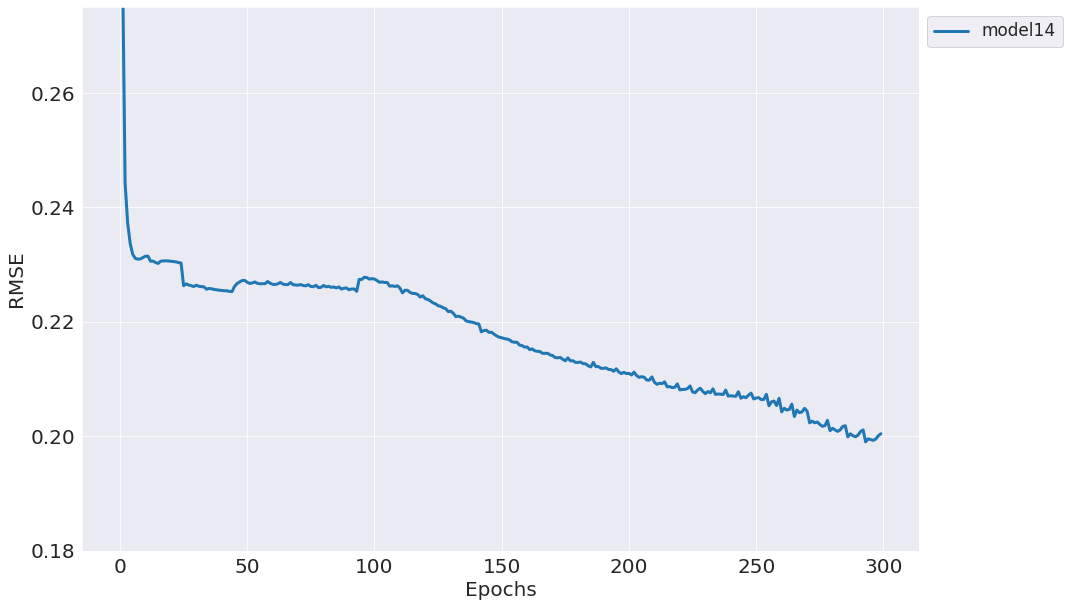

In [ ]:
# Plot skenario pertama
comparison_plot('val_root_mean_squared_error')
plt.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=17)
plt.ylim([0.18,0.275])

In [ ]:
print(comparison_plot)

<function comparison_plot at 0x7f6408f42320>


In [ ]:
# Prediksi curah hujan selama 3 tahun (36 bulan) dari 2021-2023 kedepan dengan model pilihan
df_month_pred = df_month_scaled
for n in range(36):
  pred = model_dict['model14']['model'].predict(df_month_pred[len(df_month_pred)-12:][np.newaxis])
  df_month_pred = np.append(df_month_pred, pred, axis=0)

In [ ]:
# Denormalisasi hasil peramalan
pred_data = scaler.inverse_transform(df_month_pred[-36:])

In [ ]:
# Pembentukan Tabel
pred_df = pd.DataFrame(pred_data, columns = ['RR'])
pred_date = pd.DataFrame(pd.date_range(start ='01-01-2021', freq = 'MS', periods = 36), columns = ['date'])
pred_df = pd.concat([pred_date, pred_df], axis=1)
pred_df.set_index('date', inplace=True)

In [ ]:
pred_df = pd.concat([df_month, pred_df], axis=0)

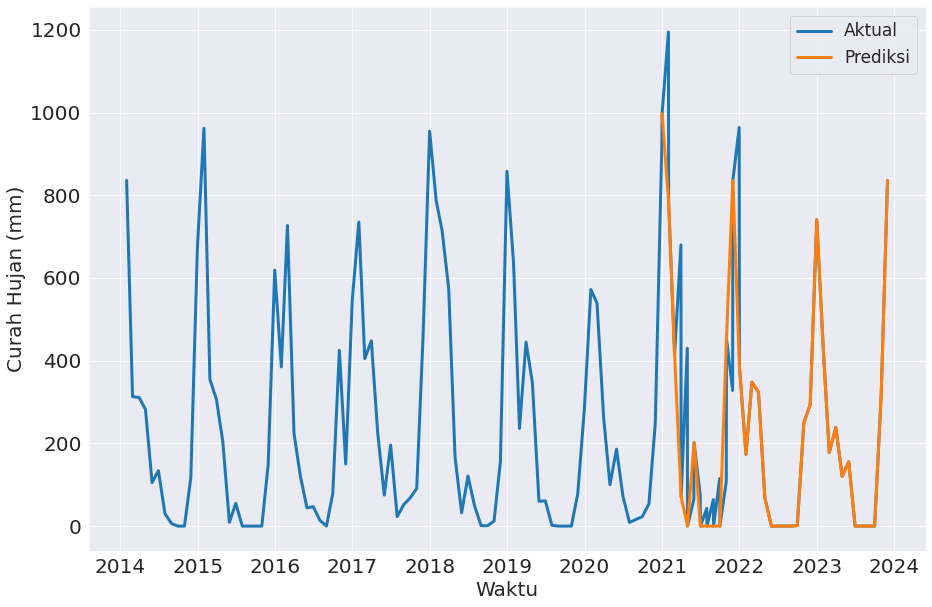

In [ ]:
# Plot data secara keseluruhan beserta hasil peramalan 2021-2023
plt.figure(figsize=(15, 10))
sns.lineplot(x=pred_df.index, y='RR', data = pred_df, linewidth=3)
sns.lineplot(x=pred_df[-36:].index, y='RR', data = pred_df[-36:], linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("Waktu", fontsize=20)
plt.ylabel("Curah Hujan (mm)", fontsize=20)
plt.legend(('Aktual', 'Prediksi'), fontsize=17)

Text(0, 0.5, 'Curah Hujan (mm)')

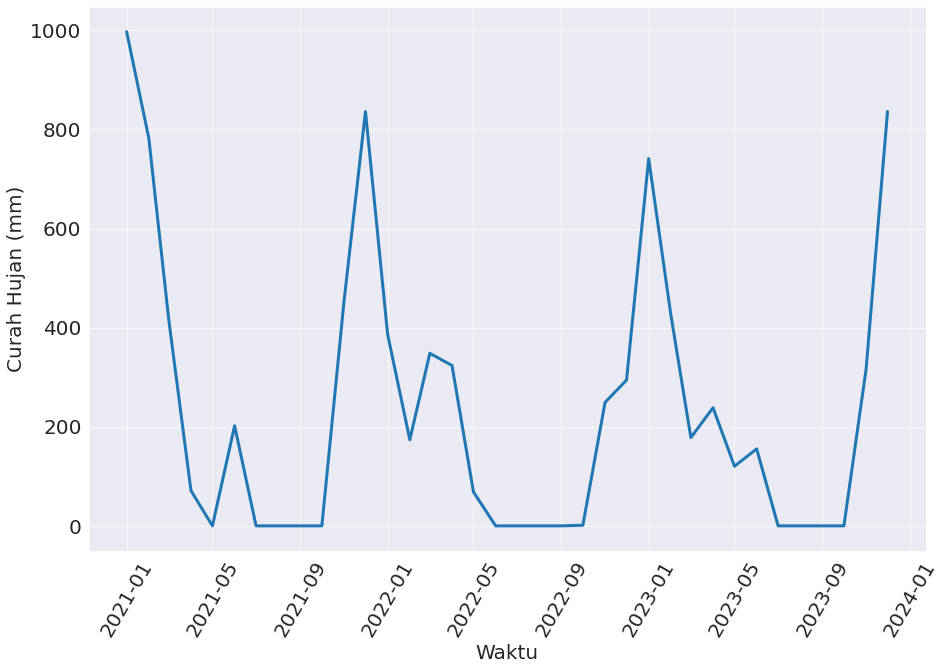

In [ ]:
# Plot hasil peramalan curah hujan tahun 2021-2023
plt.figure(figsize=(15, 10))
sns.lineplot(x=pred_df[-36:].index, y='RR', data = pred_df[-36:], linewidth = 3)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.xlabel("Waktu", fontsize=20)
plt.ylabel("Curah Hujan (mm)", fontsize=20)

In [ ]:
pred_df[-36:]

,RR
2021-01-01,997.206648
2021-02-01,782.453019
2021-03-01,415.065765
2021-04-01,70.959788
2021-05-01,0.000000
2021-06-01,201.999855
2021-07-01,0.000000
2021-08-01,0.000000
2021-09-01,0.000000
2021-10-01,0.000000
